# Telecom Churn using Python Keras Neural Network

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [123]:
data = pd.read_csv("churn.csv")
data.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [124]:
#change state ,churn international plan and vmail to  to factor
data['Churn'] = data['Churn'].astype('category')
data['State'] = data['State'].astype('category')
data['Intl Plan'] = data['Intl Plan'].astype('category')
data['VMail Plan'] = data['VMail Plan'].astype('category')
data['Intl Plan'] = np.where(data['Intl Plan'] == 'yes',1,0)
data['VMail Plan']= np.where(data['VMail Plan'] == 'yes',1,0)


#drop phone column as it will not be beneficial to model creation
data = data.drop(['Phone'], axis=1)

#convert churn to binary  (0,1)
data['Churn'] = np.where(data['Churn'] == 'True.',1,0)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   State           3333 non-null   category
 1   Account Length  3333 non-null   int64   
 2   Area Code       3333 non-null   int64   
 3   Intl Plan       3333 non-null   int32   
 4   VMail Plan      3333 non-null   int32   
 5   VMail Message   3333 non-null   int64   
 6   Day Mins        3333 non-null   float64 
 7   Day Calls       3333 non-null   int64   
 8   Day Charge      3333 non-null   float64 
 9   Eve Mins        3333 non-null   float64 
 10  Eve Calls       3333 non-null   int64   
 11  Eve Charge      3333 non-null   float64 
 12  Night Mins      3333 non-null   float64 
 13  Night Calls     3333 non-null   int64   
 14  Night Charge    3333 non-null   float64 
 15  Intl Mins       3333 non-null   float64 
 16  Intl Calls      3333 non-null   int64   
 17  Intl Charge   

In [126]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

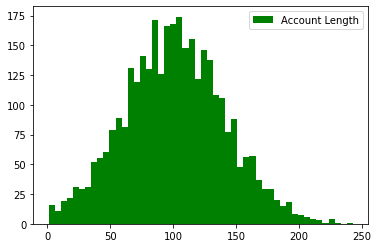

In [127]:
_= plt.hist(data.iloc[:,1] , 50, facecolor='green', alpha=1)
plt.legend([list(data)[1]])

"Charge" and "Mins" attributes have linear correlation and Minutes, "Mins" is considered redundant for each Type and can be removed. Also, dopping "State" attribute.

In [128]:
data = data.drop(['State','Day Mins','Eve Mins','Night Mins','Intl Mins'], axis=1)

In [129]:
#from sklearn.model_selection import train_test_split  80/20 split
train_set, test_set = train_test_split( data, test_size=0.2, random_state=44)
target = 'Churn'
features = list(data.columns)
features = [f for f in features if f!=target]


#Create training set 
X_tr = train_set[features]
y_tr = train_set[[target]]
#create test set
X_te = test_set[features]
y_te = test_set[[target]]

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_tr = scaler.fit_transform(X_tr)
X_tr = pd.DataFrame(X_tr)

X_te = scaler.fit_transform(X_te)
X_te = pd.DataFrame(X_te)

In [131]:
y_tr=keras.utils.to_categorical(y_tr)
y_teo=y_te
y_te = keras.utils.to_categorical(y_te)

In [132]:
#START BUILDING THE MODEL
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

#output classes (churn: yes,no)
classes=2
# define baseline model
def baseline_model_churn():
	# create model
	model= Sequential()
	model.add(Dense(20,input_dim=len(data.columns)-1,activation='relu')) 
  # 20 neurons 15 attributes
  #removed this node as is was causing overfit
	model.add(Dense(10,activation='relu')) 
	model.add(Dense(4,activation='relu')) 
	model.add(Dense(classes,kernel_initializer = 'uniform',activation='sigmoid'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
	#using adam optimizer
	return model


In [133]:
model = baseline_model_churn()
history = model.fit( X_tr, y_tr, validation_split=0.2, epochs=200, batch_size=10, verbose=0)
# list all data in history  model.


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


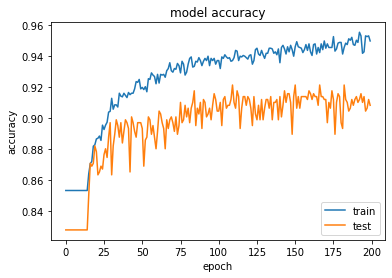

In [134]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

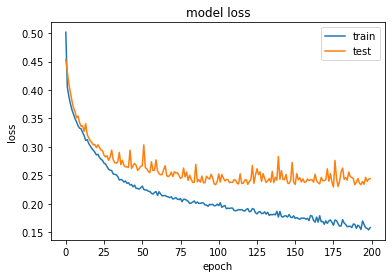

In [135]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [136]:

estimator = KerasClassifier(build_fn=baseline_model_churn, epochs=100, batch_size=10, verbose=0)

In [137]:
seed= 34
kfold = KFold(n_splits=2, shuffle=True, random_state=seed)

In [138]:
results = cross_val_score(estimator, X_tr, y_tr, cv=kfold)

In [139]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 88.26% (1.84%)


In [140]:
#Confution Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

test_loss, test_acc = model.evaluate(X_te, y_te)

667/667 [==============================] - 0s 27us/step


In [141]:
print('Churn Test accuracy:', test_acc*100)

Churn Test accuracy: 88.60569596290588


In [142]:
Y_pred = model.predict(X_te)
y_pred = np.argmax(Y_pred, axis=1)

[[559 108]
 [  0   0]]


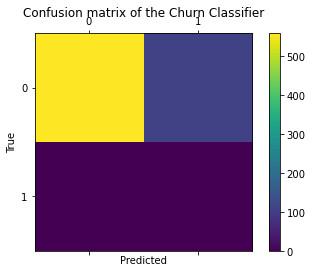

In [143]:
#Let'ss create confusion matrix
import matplotlib.pyplot as plt

labels = [ 0,1]
y_te1 = np.argmax(y_teo, axis=1)
cm = confusion_matrix(y_te1, y_pred, labels)
print(cm)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the Churn Classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()